In [1]:
import gym
import gym_anytrading
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C,PPO

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [25]:
df = pd.read_csv("reliance.csv", encoding='utf-8')
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-Sep-2023,EQ,"2,341.80","2,369.10","2,334.10","2,334.10","2,342.05","2,345.00","2,350.92","2,630.95","2,325.00","61,71,007","14,50,75,25,911.60","1,78,898"
1,28-Sep-2023,EQ,"2,383.00","2,383.00","2,325.00","2,368.90","2,339.00","2,334.10","2,352.03","2,630.95","2,325.00","72,59,173","17,07,38,06,729.35","2,83,992"
2,27-Sep-2023,EQ,"2,343.50","2,371.80","2,338.50","2,342.50","2,371.00","2,368.90","2,355.73","2,630.95","2,335.10","58,61,389","13,80,78,21,671.35","2,33,089"
3,26-Sep-2023,EQ,"2,338.55","2,350.20","2,335.60","2,340.45","2,340.00","2,342.50","2,342.35","2,630.95","2,335.10","50,43,891","11,81,45,81,030.50","1,68,749"
4,25-Sep-2023,EQ,"2,350.40","2,360.70","2,335.10","2,354.95","2,339.50","2,340.45","2,343.52","2,630.95","2,335.10","71,27,442","16,70,32,85,186.15","2,66,745"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,06-Oct-2022,EQ,"2,429.00","2,450.00","2,418.15","2,413.20","2,422.50","2,422.10","2,433.70","2,856.15","2,180.00","61,62,021","14,99,64,87,081.50","2,12,103"
245,04-Oct-2022,EQ,"2,397.80","2,418.00","2,390.15","2,369.50","2,412.90","2,413.20","2,406.73","2,856.15","2,180.00","41,29,893","9,93,95,56,462.20","1,52,496"
246,03-Oct-2022,EQ,"2,391.50","2,416.95","2,363.00","2,377.75","2,367.05","2,369.50","2,382.06","2,856.15","2,180.00","54,70,030","13,02,99,23,334.80","2,30,794"
247,30-Sep-2022,EQ,"2,311.00","2,402.00","2,311.00","2,325.30","2,376.15","2,377.75","2,371.60","2,856.15","2,180.00","85,89,908","20,37,18,10,194.00","2,64,760"


In [28]:
df.dtypes

Date             object
series           object
OPEN             object
HIGH             object
LOW              object
PREV. CLOSE      object
ltp              object
close            object
vwap             object
52W H            object
52W L            object
VOLUME           object
VALUE            object
No of trades     object
dtype: object

In [17]:
df['Date']

KeyError: 'Date'

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

KeyError: 'Date'

In [5]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-25,17.00,17.72,16.85,17.67,"2,181,230"
2023-09-22,17.18,17.35,17.00,17.18,"2,102,886"
2023-09-21,17.28,17.32,16.65,17.02,"2,913,533"
2023-09-20,17.63,17.93,17.45,17.52,"2,134,121"
2023-09-19,17.59,17.64,17.13,17.52,"2,584,791"


In [42]:
from gym_anytrading.envs import StocksEnv

In [44]:
env = StocksEnv(df,window_size=5, frame_bound=(5,100))

In [47]:
env.signal_features.size

200

In [48]:
env.action_space

Discrete(2)

info : {'total_reward': 0.07000160217285156, 'total_profit': 0.7373491117543961, 'position': <Positions.Short: 0>}


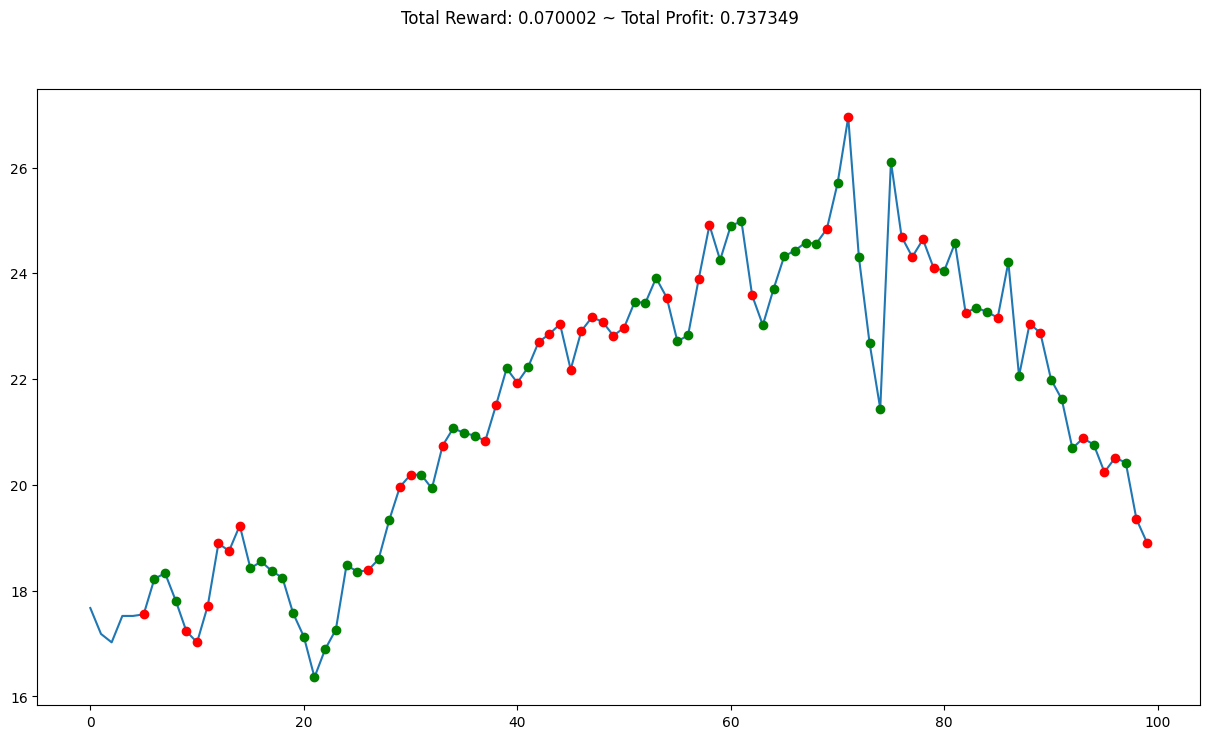

In [50]:
observation = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward,terminated, truncated, info = env.step(action)
    done = terminated or truncated
    
    if done:
        print("info :", info)
        break
plt.figure(figsize=(15,8))
plt.cla()
env.render_all()
plt.show()

In [51]:
vec_env = DummyVecEnv([lambda:env])

In [59]:
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 476  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 365         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014031626 |
|    clip_fraction        | 0.0591      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | 0.00585     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.951       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00466    |
|    value_loss           | 2.08        |
-----------------------------------------
-----------------

In [ ]:
evaluate